In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from udisc_stats import (
    preprocess,
    get_year_stats,
    moving_avg,
    get_score_avg,
    get_score_counts,
    get_player_stats,
    print_segments,
    get_month_df,
    get_goal,
    plot_month_df,
)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
orig_df = pd.read_csv("~/Downloads/Udisc Scorecards 3.csv")

orig_df.head()

,PlayerName,CourseName,LayoutName,Date,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28
0,Par,Bryan Park,Paver Tees,2022-07-23 09:31,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monkey,Bryan Park,Paver Tees,2022-07-23 09:31,65,7.0,3,3,3,5,3,3,3,4,5,4.0,6.0,3.0,4.0,4.0,2.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bryan Der,Bryan Park,Paver Tees,2022-07-23 09:31,62,4.0,3,3,3,5,4,4,3,4,3,3.0,5.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Par,Bryan Park,Yellows Tees,2022-07-20 18:42,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Monkey,Bryan Park,Yellows Tees,2022-07-20 18:42,56,-2.0,2,3,2,4,2,3,3,3,3,3.0,4.0,3.0,4.0,3.0,2.0,3.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = preprocess(orig_df)

df.head()

2020-11-05 17:22:00


,PlayerName,CourseName,LayoutName,Date,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28,LayoutNameAdj,Year
0,Par,Bryan Park,Paver Tees,2022-07-23 09:31:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paver Tees,2022
1,Monkey,Bryan Park,Paver Tees,2022-07-23 09:31:00,65,7.0,3,3,3,5,3,3,3,4,5,4.0,6.0,3.0,4.0,4.0,2.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paver Tees,2022
2,Bryan Der,Bryan Park,Paver Tees,2022-07-23 09:31:00,62,4.0,3,3,3,5,4,4,3,4,3,3.0,5.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paver Tees,2022
3,Par,Bryan Park,Yellows Tees,2022-07-20 18:42:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2022
4,Monkey,Bryan Park,Yellows Tees,2022-07-20 18:42:00,56,-2.0,2,3,2,4,2,3,3,3,3,3.0,4.0,3.0,4.0,3.0,2.0,3.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2022


In [4]:
print_segments(df)

Players: ['Par', 'Monkey', 'Bryan Der', 'Riley', 'Scott', 'James M.', 'Sam Forsyth', 'Noah', 'Austin', 'Bryce', 'John Farmer', 'Tyler', 'Hitesh', 'Glasser', 'David', 'Patty Ice ']
Courses: ['Bryan Park', 'Elver Park', 'Nine Springs Golf Course', 'Schenley Park', 'Loriella Park', 'Dunncroft - Castle Point Park', 'Dorey Park', 'Gillies Creek Park', "Bird's Ruins DGC", 'THE Diavolo DGC @ New Hope Park', 'University Of Richmond', 'Bluemont Park']
Layouts: ['Paver Tees', 'Yellows Tees', 'Front 9 ', '2022 USWDGC', 'Main', 'White Tees', 'White Tees to Yellow Baskets', 'Shorts then Longs', 'White - Short Tees', 'Red - Short Tees', 'Shorts To Shorts', 'Back 9', 'Blue - Long Tees', 'Diavolo White', 'Chainbangers’ 18', 'Short tees Red baskets']


In [5]:
get_goal(df)

Score: 8.0


In [6]:
course="Bryan Park"
# course="Dunncroft - Castle Point Park"

layout="Yellows Tees"
# layout="Paver Tees"
# layout = "Shorts then Longs"

min_date="2020-01"
# min_date="2021-01"
# min_date="2022-01"

Yearly Stats for Monkey at Bryan Park from the Yellows Tees


,PlayerName,CourseName,LayoutNameAdj,Year,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18
31,Monkey,Bryan Park,Yellows Tees,2020,76.272727,18.272727,3.545455,4.090909,4.000000,4.727273,3.909091,3.727273,3.545455,5.181818,4.727273,4.090909,6.181818,3.818182,3.818182,5.000000,3.727273,4.090909,4.909091,3.181818
32,Monkey,Bryan Park,Yellows Tees,2021,62.240506,4.240506,2.898734,3.253165,3.189873,4.139241,3.139241,3.075949,3.025316,3.936709,3.949367,3.569620,5.063291,3.164557,3.253165,3.443038,2.987342,3.202532,4.139241,2.810127
33,Monkey,Bryan Park,Yellows Tees,2022,58.300000,0.300000,2.900000,2.960000,2.960000,3.880000,2.920000,2.880000,2.800000,3.780000,3.560000,3.360000,4.720000,2.880000,3.260000,3.400000,2.960000,2.900000,3.500000,2.680000


/Users/justin/github/udisc_stats/udisc_stats.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_df["MonthStr"] = viz_df["Month"].dt.strftime("%Y-%m")


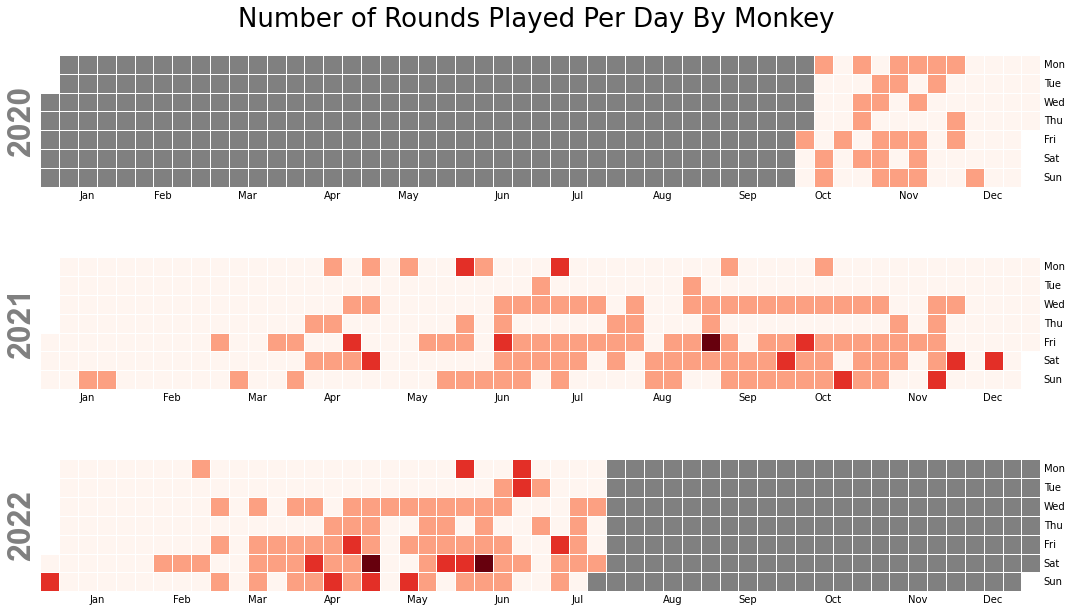

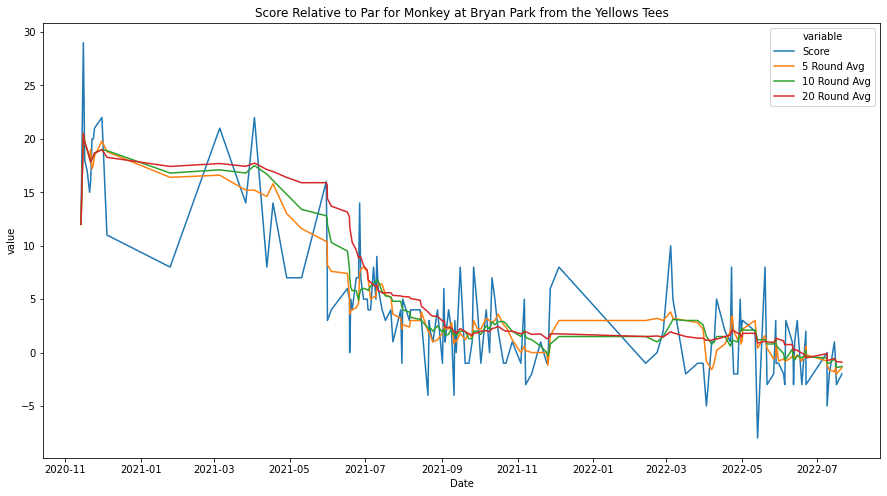

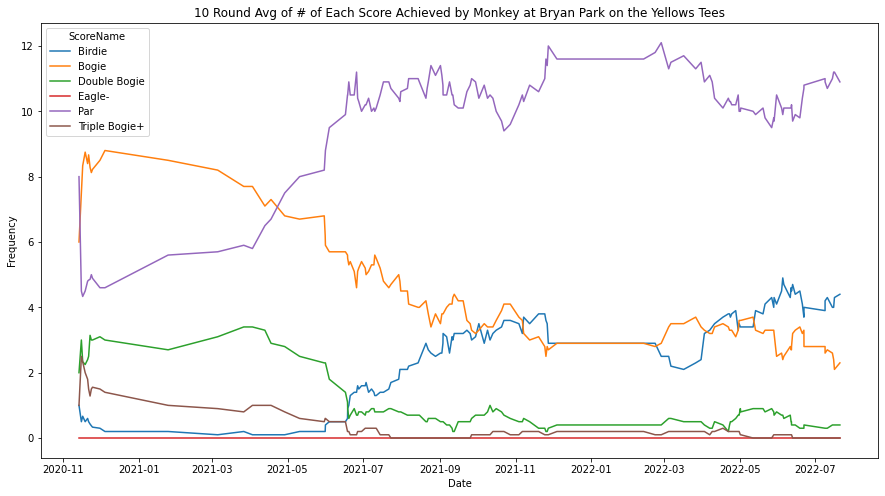

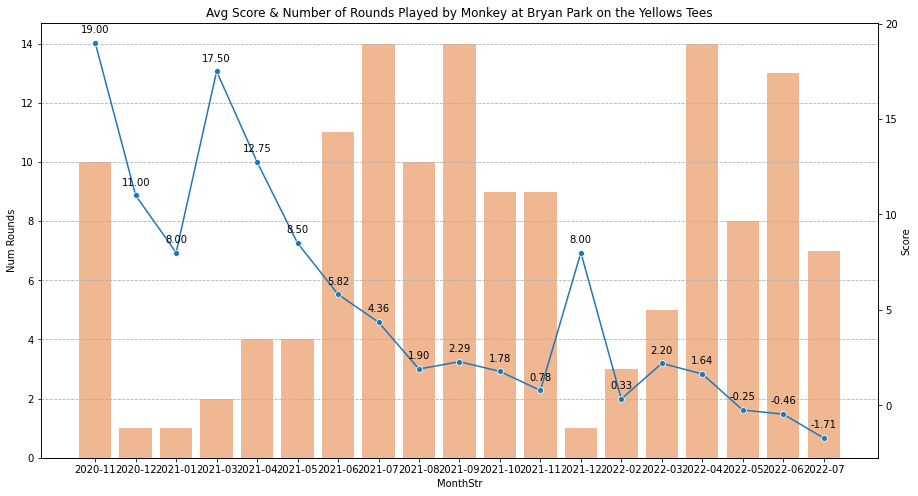

In [7]:
get_player_stats(
    df=df,
    player="Monkey",
    course=course,
    layout=layout,
    min_date=min_date,
)

Yearly Stats for Bryan Der at Bryan Park from the Yellows Tees


,PlayerName,CourseName,LayoutNameAdj,Year,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18
4,Bryan Der,Bryan Park,Yellows Tees,2021,67.720000,9.720000,3.360000,3.84,3.600000,4.72,3.2,3.24,3.120000,4.4,4.280000,4.08,5.680000,3.320000,3.360000,4.12,3.200000,2.6,4.320000,3.280000
5,Bryan Der,Bryan Park,Yellows Tees,2022,64.133333,6.133333,3.066667,3.60,3.666667,4.60,3.0,3.20,2.933333,4.2,3.933333,3.80,5.533333,2.933333,3.133333,3.60,3.066667,2.8,3.933333,3.133333


/Users/justin/github/udisc_stats/udisc_stats.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_df["MonthStr"] = viz_df["Month"].dt.strftime("%Y-%m")


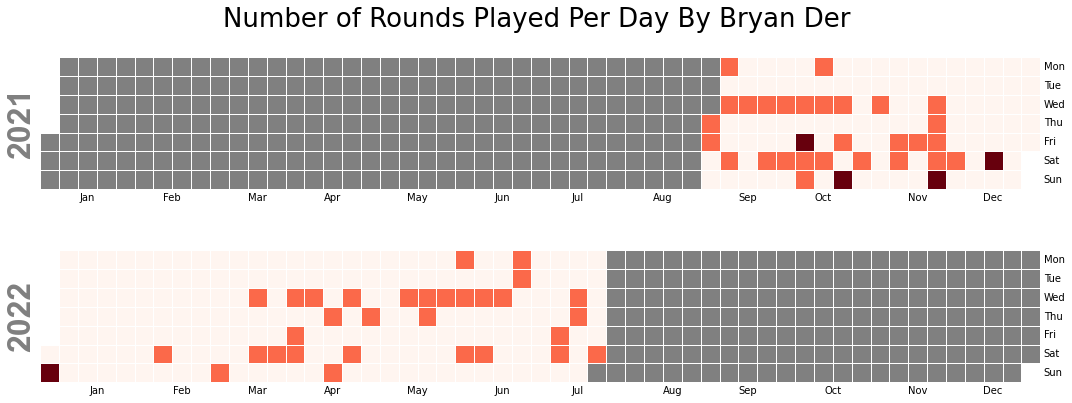

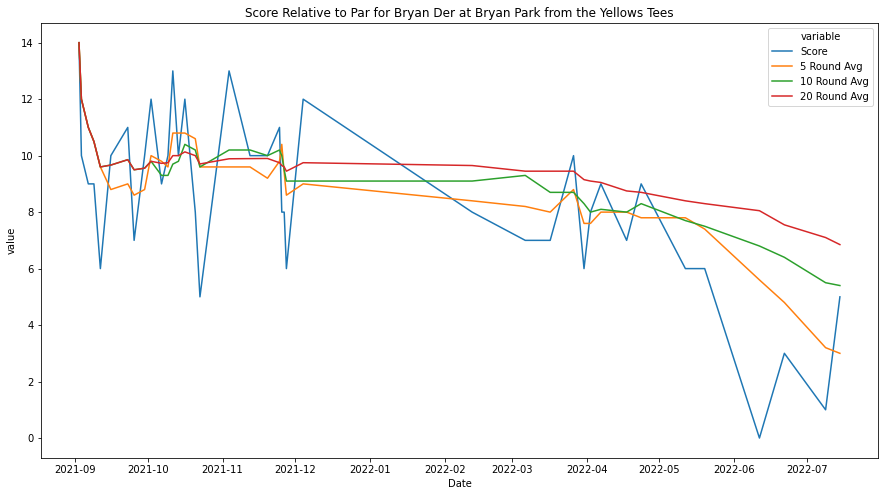

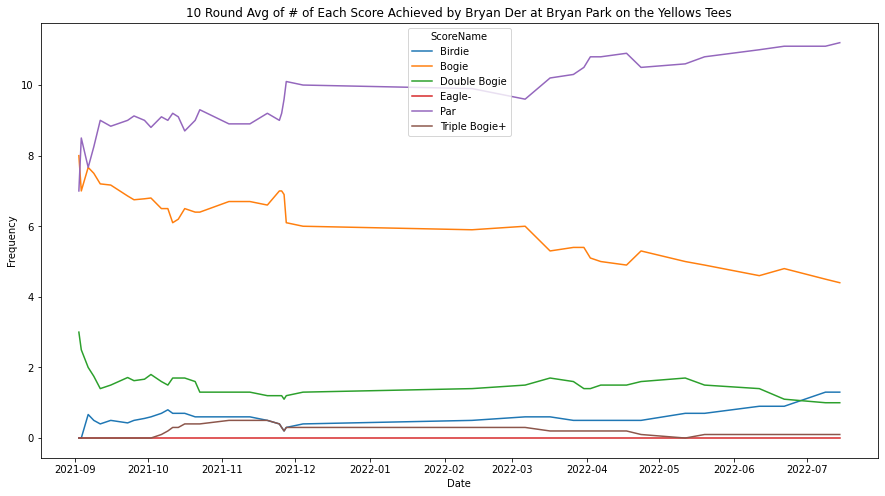

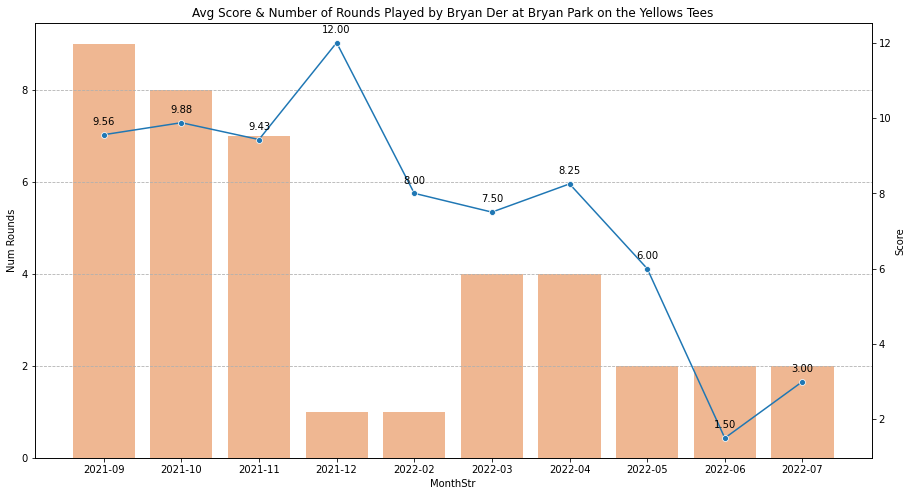

In [8]:
get_player_stats(
    df=df,
    player="Bryan Der",
    course=course,
    layout=layout,
    min_date=min_date,
)

Yearly Stats for Riley at Bryan Park from the Yellows Tees


,PlayerName,CourseName,LayoutNameAdj,Year,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18
88,Riley,Bryan Park,Yellows Tees,2021,77.250000,19.250000,4.000000,4.000000,4.0,5.000000,4.000000,4.000000,3.5,4.500000,4.500000,4.000000,6.250000,4.250000,4.250000,4.250000,4.250000,3.250000,5.750000,3.500000
89,Riley,Bryan Park,Yellows Tees,2022,70.214286,12.214286,3.428571,3.357143,4.0,4.857143,3.714286,3.928571,3.5,4.071429,4.214286,4.071429,5.642857,3.785714,3.357143,3.857143,3.214286,3.642857,4.785714,2.785714


/Users/justin/github/udisc_stats/udisc_stats.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_df["MonthStr"] = viz_df["Month"].dt.strftime("%Y-%m")


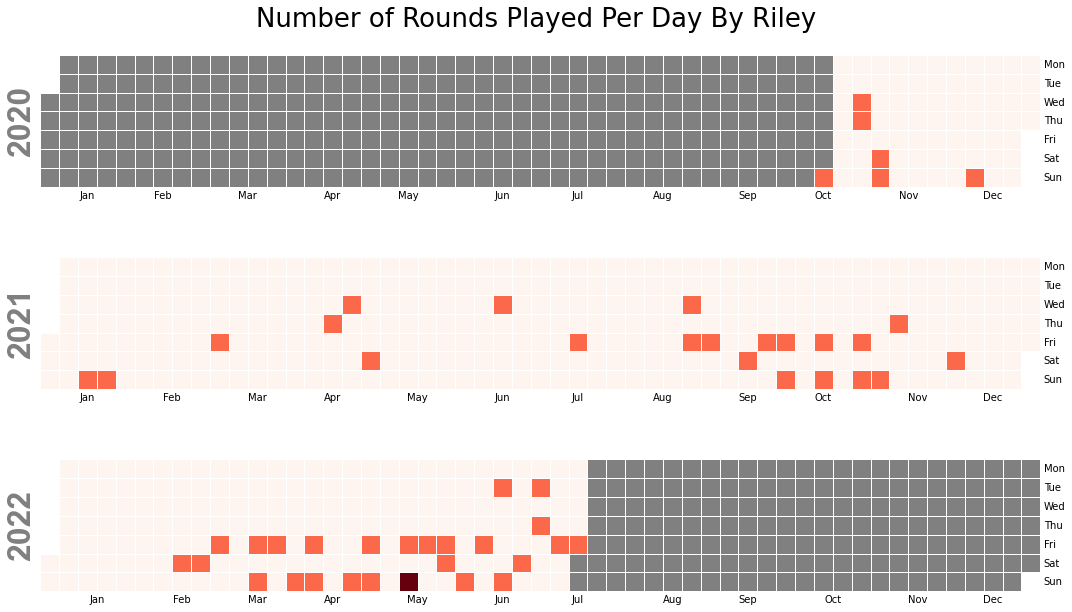

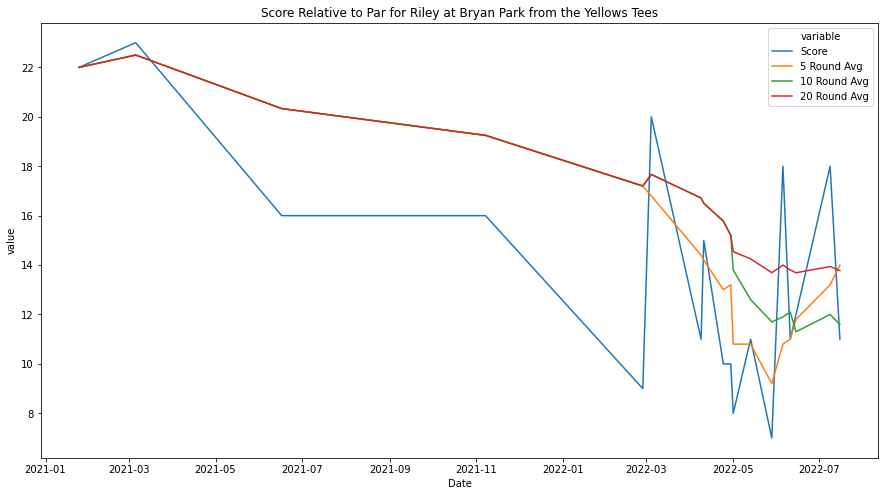

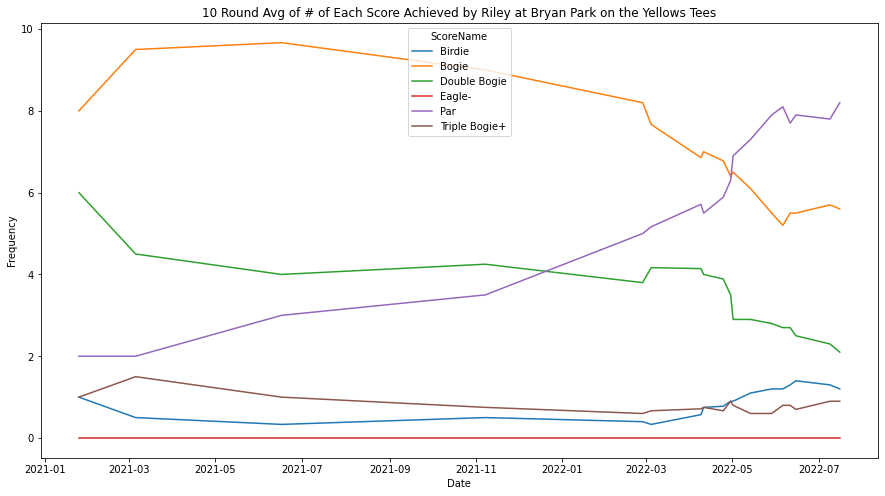

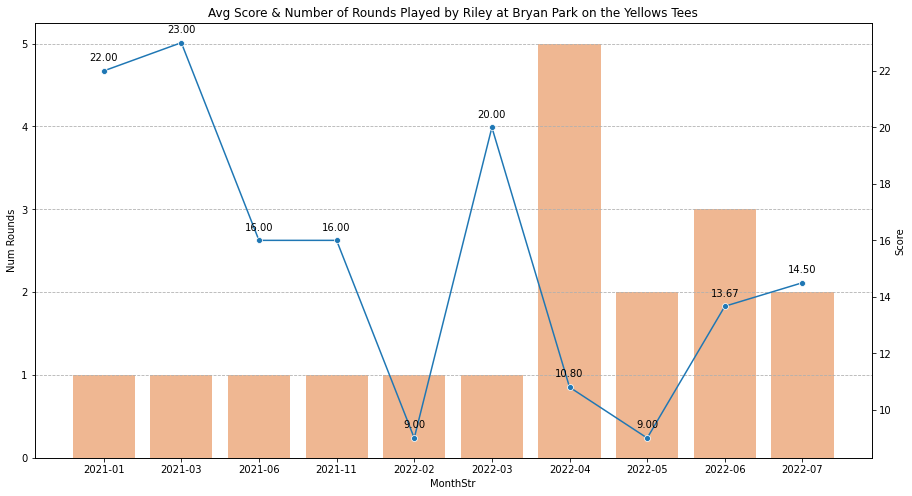

In [9]:
get_player_stats(
    df=df,
    player="Riley",
    course=course,
    layout=layout,
    min_date=min_date,
)